In [1]:
import re
import os
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    sentences = sent_tokenize(text)
    cleaned_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_sentence = ' '.join([w for w in words if w.lower() not in stop_words and w.isalpha()])
        cleaned_sentences.append(filtered_sentence)

    return cleaned_sentences

def get_embeddings(sentences):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    model.eval()

    embeddings = []

    with torch.no_grad():
        for sentence in sentences:
            inputs = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True, max_length=128)
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())

    return np.array(embeddings)

def cluster_sentences(embeddings, sentences, num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(embeddings)
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)
    
    clusters = {}
    for idx, label in enumerate(kmeans.labels_):
        clusters.setdefault(label, []).append(sentences[idx])

    return clusters, closest

def save_clusters(clusters, sentences, closest):
    os.makedirs('requirements_clustersInRuby', exist_ok=True)
    
    for label, cluster_sentences in clusters.items():
        with open(f'requirements_clusters/cluster_{label}.txt', 'w') as file:
            file.write("Example sentence:\n")
            file.write(f"{sentences[closest[label]]}\n\n")
            file.write("Cluster sentences:\n")
            for sentence in cluster_sentences:
                file.write(f"{sentence}\n")
    
    print("Output files created in 'requirements_clusters' folder.")

def main():
    try:
        with open('nfr (1).txt', 'r') as file:
            text = file.read()

        sentences = preprocess_text(text)
        embeddings = get_embeddings(sentences)
        clusters, closest = cluster_sentences(embeddings, sentences, num_clusters=3)
        save_clusters(clusters, sentences, closest)

    except FileNotFoundError:
        print("The file was not found. Please check the file path and try again.")

if __name__ == "__main__":
    main()


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Output files created in 'requirements_clusters' folder.


<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
C:\Users\user\AppData\Local\Temp\ipykernel_28356\3051825668.py:7: SyntaxWarning: invalid escape sequence '\c'
  'Original Cluster 0': 'requirements_clusters\cluster_0.txt',
C:\Users\user\AppData\Local\Temp\ipykernel_28356\3051825668.py:8: SyntaxWarning: invalid escape sequence '\c'
  'Original Cluster 1': 'requirements_clusters\cluster_1.txt',
C:\Users\user\AppData\Local\Temp\ipykernel_28356

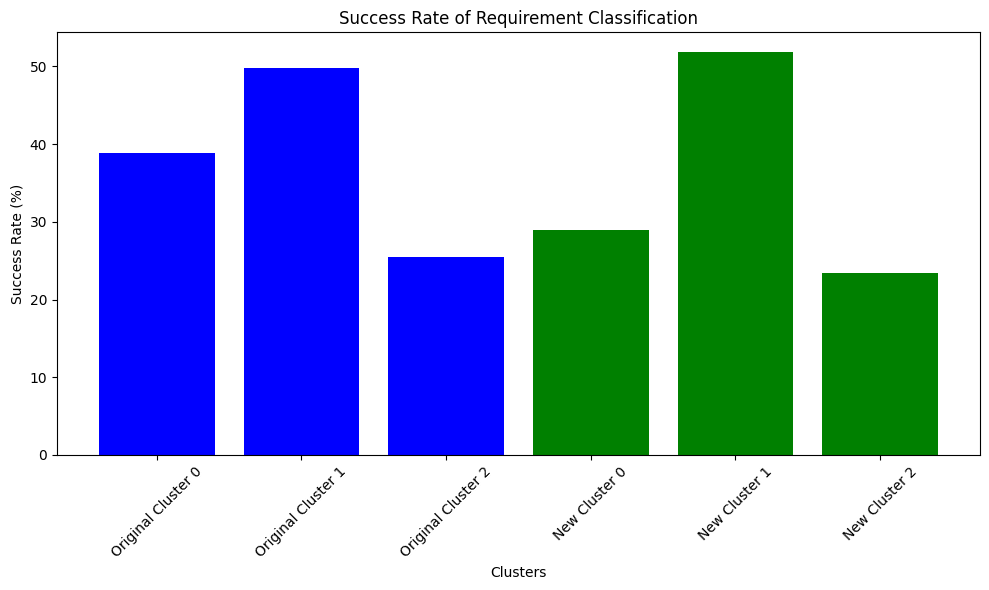

In [2]:
import matplotlib.pyplot as plt
import os

# Define file paths
original_file = 'nfr (1).txt'
cluster_files = {
    'Original Cluster 0': 'requirements_clusters\cluster_0.txt',
    'Original Cluster 1': 'requirements_clusters\cluster_1.txt',
    'Original Cluster 2': 'requirements_clusters\cluster_2.txt',
    'New Cluster 0': 'requirements_clustersnew\cluster_0new.txt',
    'New Cluster 1': 'requirements_clustersnew\cluster_1new.txt',
    'New Cluster 2': 'requirements_clustersnew\cluster_2new.txt'
}

# Read original requirements
with open(original_file, 'r') as file:
    original_requirements = file.readlines()

total_requirements = len(original_requirements)

# Count requirements in each cluster file
cluster_counts = {}
for label, path in cluster_files.items():
    with open(path, 'r') as file:
        requirements = file.readlines()
    cluster_counts[label] = len(requirements)

# Calculate success rates
success_rates = {label: (count / total_requirements) * 100 for label, count in cluster_counts.items()}

# Plotting
labels = list(success_rates.keys())
values = list(success_rates.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'blue', 'green', 'green', 'green'])
plt.xlabel('Clusters')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate of Requirement Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
